In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('201808-citibike-tripdata.csv.zip')

In [35]:
df.info()
df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977177 entries, 0 to 1977176
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             float64       
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         float64       
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           float64       
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth year               int64         
 14  gender                   int64         
 15  years_old                int32         
 16  starthour                category      
 17  startday                 ca

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [4]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


For the better understanding of trip data entries we now expand the meaning of column names:
    
1. Trip Duration (seconds) — How long a trip lasted
2. Start Time and Date - Self explanatory
3. Stop Time and Date - Self explanatory
4. Start Station Name - Self explanatory
5. End Station Name - Self explanatory
6. Station ID - Unique identifier for each station
7. Station Lat/Long - Coordinates
8. Bike ID - unique identifier for each bike
9. User Type (Customer = 24-hour pass or 3-day pass user;  Subscriber = Annual Member) - Customers are usually tourists, subscribers are usually NYC residents
10. Gender (Zero=unknown; 1=male; 2=female) - Usually unknown for customers since they often sign up at a kiosk
11. Year of Birth - Self entered, not validated by an ID.

In [5]:
#clean up the missing values and drop duplicates, check with 
df[['starttime','stoptime']] = df[['starttime','stoptime']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
#drop duplicates from the data
df.drop_duplicates(inplace=True)
duplicateValues = df.duplicated()

In [7]:
#column age
df['years_old'] = df['starttime'].dt.year - df['birth year'] 
df['years_old'] = df['years_old'].astype(int)

C:\Users\pravd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pravd\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\pravd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

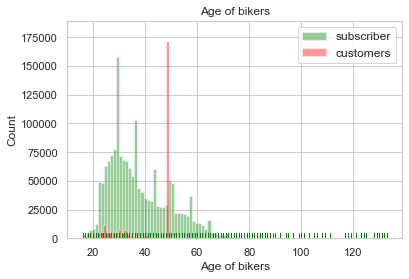

In [8]:
df_subscribers = df[df["usertype"] == "Subscriber"]
df_customers = df[df["usertype"] == "Customer"]
sns.set(style="whitegrid", color_codes=True)
sns.distplot(df_subscribers['years_old'], kde= False,color = "Green", label = "subscriber", bins = 100 ,rug = True)
sns.distplot(df_customers['years_old'], kde= False, color = "Red" , label = "customers", bins = 100)
plt.legend(prop={'size': 12})
plt.title('Age of bikers')
plt.xlabel('Age of bikers')
plt.ylabel('Count')

In [9]:
df['tripduration'] = df['tripduration']/60

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,years_old
0,11.350000,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,32
1,10.416667,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,49
2,21.983333,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,48
3,3.666667,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,36
4,6.633333,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,31


In [11]:
#Checking with rush hours

df['starthour'] = df['starttime'].dt.hour.astype('category')
df['startday'] = df['starttime'].dt.day.astype('category')
df['weekday'] = df['starttime'].dt.weekday.astype('category')

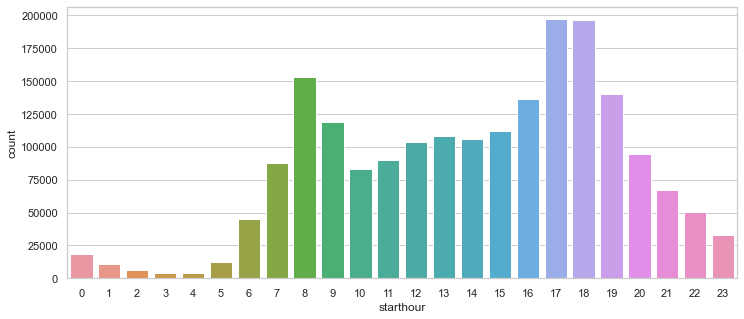

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x = "starthour");

In [13]:
#calculate distance, this is required while creating the model

def haversine_dist(lat1, lon1, lat2, lon2):
    lat1,lon1,lat2,lon2 =  map(np.radians,[lat1,lon1,lat2,lon2])
    h = np.sin((lat2-lat1)/2.0)**2
    miles = 3959*(2*np.arcsin(np.sqrt(h)))
    return miles

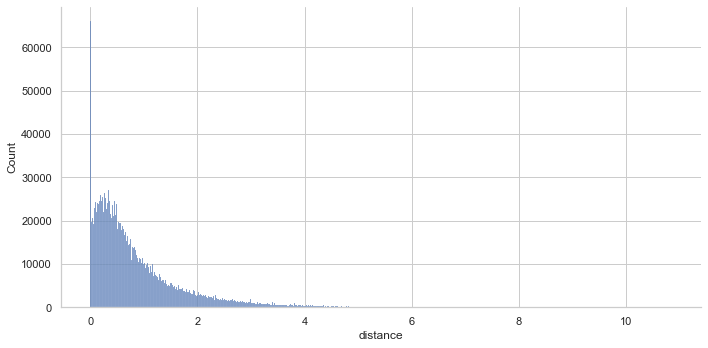

In [14]:
distance = haversine_dist(df['start station latitude'], df['start station longitude'], df['end station latitude'], df['end station longitude'])
df['distance'] = distance
sns.displot(data=df, x = "distance", aspect=10/5)

In [15]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,years_old,starthour,startday,weekday,distance
0,11.350000,2018-08-01 00:00:07.321,2018-08-01 00:11:28.992,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,32,0,1,2,1.438141
1,10.416667,2018-08-01 00:00:19.748,2018-08-01 00:10:45.029,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,49,0,1,2,0.855523
2,21.983333,2018-08-01 00:00:21.175,2018-08-01 00:22:20.637,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,48,0,1,2,0.657595
3,3.666667,2018-08-01 00:00:26.470,2018-08-01 00:04:06.819,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,36,0,1,2,0.364606
4,6.633333,2018-08-01 00:00:30.291,2018-08-01 00:07:09.281,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,31,0,1,2,0.681226


In [36]:
df['trip'] = df['start station name'] + ' to ' + df['end station name']
df['trip'] = df['trip'].astype('category')
df['avg_duration'] = df.groupby(['trip','usertype'])['tripduration'].transform('median')
df.isnull().values.any()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977177 entries, 0 to 1977176
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             float64       
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         float64       
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           float64       
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth year               int64         
 14  gender                   int64         
 15  years_old                int32         
 16  starthour                category      
 17  startday                 ca

Trying to predict a model based on the question - if given a station and end station, how long will be the trip 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [43]:
#base model
X = df[['distance', 'gender', 'avg_duration']]
y = df['tripduration']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').